### Ce notebook contient le preprocessing du dataset.
### Certaines visualisations sont incluses ici car elles nécessitent
### d’analyser les données APRÈS regroupement et nettoyage.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/dataset.csv")

->>> on refait d'abord toutes les modifs sur le dataset faites dans 01_exploration

In [2]:
df = df.drop(columns=["Unnamed: 0"])
cols_to_drop = ["track_id", "artists", "album_name", "track_name"]
df = df.drop(columns=cols_to_drop)

# on enlève les colonnes inutiles pour l'analyse

df = df[df["duration_ms"] <= 900000]
# on enlève les morceaux de plus de 15 minutes



In [3]:
sorted(df["track_genre"].unique())
# on regarde les genres présents dans le dataset

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie',
 'indie-pop',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop',
 'pop-film',
 'power-pop',
 'progressive

on va regrouper les genres entre eux de façon à réduire le nombre de classes : 

In [4]:
genre_mapping = {
    # POP
    "acoustic": "pop",
    "alternative": "pop",
    "british": "pop",
    "children": "pop",
    "comedy": "pop",
    "disney": "pop",
    "happy": "pop",
    "indie": "pop",
    "indie-pop": "pop",
    "party": "pop",
    "pop": "pop",
    "pop-film": "pop",
    "power-pop": "pop",
    "romance": "pop",
    "sad": "pop",
    "show-tunes": "pop",
    "singer-songwriter": "pop",
    "songwriter": "pop",
    "kids": "pop",
    "synth-pop": "pop",

    # ROCK / METAL
    "alt-rock": "rock_metal",
    "black-metal": "rock_metal",
    "death-metal": "rock_metal",
    "emo": "rock_metal",
    "goth": "rock_metal",
    "grindcore": "rock_metal",
    "grunge": "rock_metal",
    "guitar": "rock_metal",
    "hard-rock": "rock_metal",
    "hardcore": "rock_metal",
    "heavy-metal": "rock_metal",
    "metal": "rock_metal",
    "metalcore": "rock_metal",
    "psych-rock": "rock_metal",
    "punk": "rock_metal",
    "punk-rock": "rock_metal",
    "rock": "rock_metal",
    "rock-n-roll": "rock_metal",
    "rockabilly": "rock_metal",

    # HIP-HOP / RAP
    "hip-hop": "hiphop",

    # ELECTRONIC / DANCE
    "breakbeat": "electronic",
    "chicago-house": "electronic",
    "club": "electronic",
    "dance": "electronic",
    "deep-house": "electronic",
    "detroit-techno": "electronic",
    "disco": "electronic",
    "drum-and-bass": "electronic",
    "dubstep": "electronic",
    "edm": "electronic",
    "electro": "electronic",
    "electronic": "electronic",
    "garage": "electronic",
    "hardstyle": "electronic",
    "house": "electronic",
    "idm": "electronic",
    "industrial": "electronic",
    "minimal-techno": "electronic",
    "progressive-house": "electronic",
    "techno": "electronic",
    "trance": "electronic",
    "trip-hop": "electronic",

    # R&B / SOUL / FUNK / GOSPEL
    "r-n-b": "rnb_soul_funk",
    "soul": "rnb_soul_funk",
    "funk": "rnb_soul_funk",
    "gospel": "rnb_soul_funk",
    "groove": "rnb_soul_funk",

    # JAZZ / BLUES
    "bluegrass": "country_folk",  # plus proche du country/folk
    "blues": "jazz_blues",
    "jazz": "jazz_blues",

    # CLASSICAL
    "classical": "classical",
    "opera": "classical",
    "piano": "classical",

    # COUNTRY / FOLK
    "country": "country_folk",
    "folk": "country_folk",
    "honky-tonk": "country_folk",

    # LATIN + WORLD / REGIONAL
    "afrobeat": "latin_world",
    "brazil": "latin_world",
    "forro": "latin_world",
    "latin": "latin_world",
    "latino": "latin_world",
    "mpb": "latin_world",
    "pagode": "latin_world",
    "salsa": "latin_world",
    "samba": "latin_world",
    "sertanejo": "latin_world",
    "spanish": "latin_world",
    "tango": "latin_world",
    "world-music": "latin_world",
    "french": "latin_world",
    "german": "latin_world",
    "indian": "latin_world",
    "iranian": "latin_world",
    "malay": "latin_world",
    "swedish": "latin_world",
    "turkish": "latin_world",
    "reggaeton": "latin_world",   # latin/urban

    # REGGAE / SKA / DANCEHALL / DUB
    "reggae": "reggae_ska",
    "ska": "reggae_ska",
    "dub": "reggae_ska",
    "dancehall": "reggae_ska",

    # ASIAN POP (J/K/C)
    "anime": "asian_pop",
    "cantopop": "asian_pop",
    "j-dance": "asian_pop",
    "j-idol": "asian_pop",
    "j-pop": "asian_pop",
    "j-rock": "asian_pop",
    "k-pop": "asian_pop",
    "mandopop": "asian_pop",

    # AMBIENT / CHILL / BACKGROUND
    "ambient": "ambient_chill",
    "chill": "ambient_chill",
    "new-age": "ambient_chill",
    "sleep": "ambient_chill",
    "study": "ambient_chill",
}


In [5]:
df["macro_genre"] = df["track_genre"].map(genre_mapping)
df["macro_genre"].isna().sum()


np.int64(0)

In [6]:
df["macro_genre"].value_counts()



macro_genre
electronic       21970
latin_world      20967
pop              19990
rock_metal       18980
asian_pop         7995
rnb_soul_funk     4997
ambient_chill     4984
reggae_ska        3998
country_folk      3985
classical         2982
jazz_blues        1999
hiphop            1000
Name: count, dtype: int64

on fait une analyse après regroupement : 

<Axes: xlabel='macro_genre'>

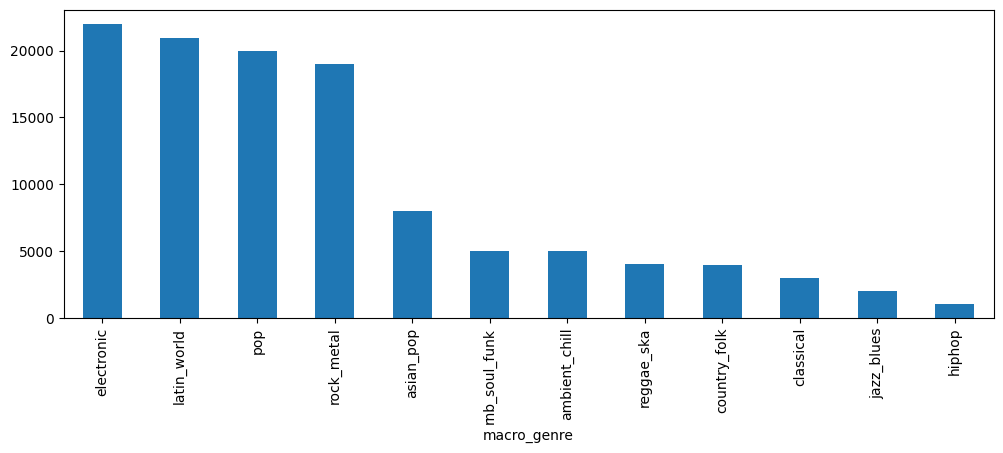

In [7]:
df["macro_genre"].value_counts().plot(kind="bar", figsize=(12,4))


on visualise les relations entre qqs features : 

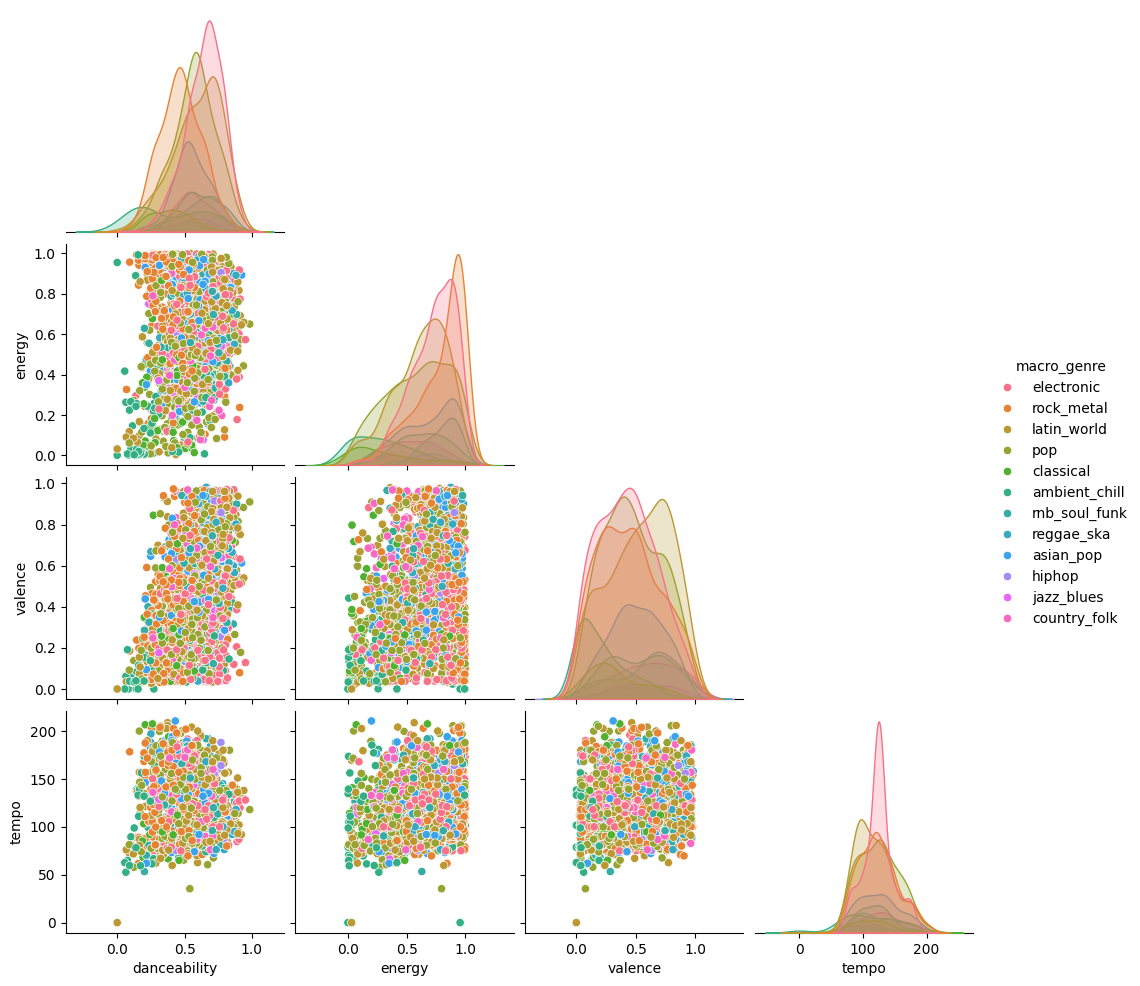

In [8]:
sample_df = df.sample(2000, random_state=42)

sns.pairplot(sample_df, vars=["danceability", "energy", "valence", "tempo"],
             hue="macro_genre", corner=True)


moyenne des features par macro-genre : 

In [9]:
num_cols = df.select_dtypes(include=["number"]).columns

df_group_mean = df.groupby("macro_genre")[num_cols].mean().T
df_group_mean


macro_genre,ambient_chill,asian_pop,classical,country_folk,electronic,hiphop,jazz_blues,latin_world,pop,reggae_ska,rnb_soul_funk,rock_metal
popularity,37.637239,39.824265,27.668008,24.214304,31.963541,37.759000,22.400700,33.163829,33.398999,32.318909,33.645587,34.520864
duration_ms,201257.672753,233028.432020,216115.250503,209537.826098,252411.391170,206680.508000,205969.768384,231528.811752,205464.946773,215490.488744,238794.149490,222008.100896
danceability,0.447635,0.571219,0.383006,0.555165,0.628463,0.736154,0.539286,0.598814,0.579612,0.658857,0.590130,0.476841
energy,0.326670,0.665459,0.275516,0.509260,0.749315,0.682530,0.467614,0.637240,0.571119,0.729764,0.629045,0.754707
key,5.065409,5.250156,5.062374,5.307905,5.508967,5.546000,5.092546,5.340964,5.158479,5.416708,5.302782,5.322076
loudness,-16.503157,-6.754283,-16.923077,-9.505904,-7.002789,-5.981619,-10.044676,-7.879154,-8.924856,-5.953884,-7.185530,-6.940540
mode,0.618780,0.655660,0.737089,0.865997,0.542376,0.479000,0.734867,0.612725,0.694997,0.577789,0.666200,0.651317
speechiness,0.069282,0.083471,0.047526,0.043921,0.078115,0.130353,0.059477,0.082775,0.111441,0.117943,0.082607,0.078542
acousticness,0.664149,0.300949,0.806079,0.516549,0.116620,0.194175,0.556754,0.379154,0.417834,0.158917,0.316088,0.171688
instrumentalness,0.615845,0.049039,0.434166,0.059505,0.298580,0.010907,0.056488,0.081442,0.075482,0.032157,0.036069,0.133862


nettoyage final après mapping : 

In [10]:
# On supprime les lignes où le macro_genre n'a pas été trouvé (par sécurité)
df = df.dropna(subset=["macro_genre"])

# Petit check
df["macro_genre"].value_counts()


macro_genre
electronic       21970
latin_world      20967
pop              19990
rock_metal       18980
asian_pop         7995
rnb_soul_funk     4997
ambient_chill     4984
reggae_ska        3998
country_folk      3985
classical         2982
jazz_blues        1999
hiphop            1000
Name: count, dtype: int64

on définit x et y 

In [11]:
# Colonnes numériques
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()


# Ici on garde tout ce qui est numérique.
print(num_cols)

# Features et target
X = df[num_cols]
y = df["macro_genre"]


['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


on encode le genre :

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Pour info :
list(le.classes_), len(le.classes_)




(['ambient_chill',
  'asian_pop',
  'classical',
  'country_folk',
  'electronic',
  'hiphop',
  'jazz_blues',
  'latin_world',
  'pop',
  'reggae_ska',
  'rnb_soul_funk',
  'rock_metal'],
 12)

Train / test split (stratifié) (stratify pour garder les proportions de genres)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=8,
    stratify=y_encoded,
)

X_train.shape, X_test.shape


((91077, 14), (22770, 14))

on standardise les fetaures en se basant juste sur le train

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


on veut un pipeline propre, donc on sauvegarde le scaler, le label encoder, les x train scaled, x test scaled, y train, y test

In [15]:
import pickle
import numpy as np
import os

os.makedirs("../models", exist_ok=True)

# Sauvegarde du scaler
with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Sauvegarde du label encoder
with open("../models/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Sauvegarde des datasets
np.save("../models/X_train.npy", X_train_scaled)
np.save("../models/X_test.npy", X_test_scaled)
np.save("../models/y_train.npy", y_train)
np.save("../models/y_test.npy", y_test)


ce qu'il va donc rester à faire dans 03_modélisation : Modèle baseline (Logistic Regression multinomiale)

Matrice de confusion

Feature importance (RandomForest, XGBoost)

Feature selection

Tests d’autres modèles

Cross-validation

Hyperparameter tuning

Choix du meilleur modèle

Évaluation finale sur test